In [74]:
import matplotlib.pyplot as plt
import numpy as np
import Phys
# physical constants in cgs units
constants = Phys.ReadPhys()

from SpecWizard_Input import ReadData
from SpecWizard_BuildInput import Build_Input
from SpecWizard_ProjectData import SightLineProjection
import importlib
import SpecWizard_ComputeOpticaldepth

SpecWizard_ComputeOpticaldepth = importlib.reload(SpecWizard_ComputeOpticaldepth)

from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth



In [63]:
x = 0.757
y = 0.805
z = 0.879

In [64]:
BuildInput = Build_Input()
BuildInput.FileType(sim_type='Eagle',snap_type='snapshot')

In [65]:
snapdir = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/snapshot_012_z003p017'
snapfile = 'snap_012_z003p017.0.hdf5'

In [66]:
BuildInput.SnapshotParams(path=snapdir,file=snapfile)

In [67]:
table_type     = 'specwizard_cloudy'
iondir         = '/cosma7/data/Eagle/SpecWizardCloudytables/HM12/'
fname          = '' 
SFR_properties = {'modify_particle':True,'ignore_particle': False,
                  'Temperature [K]':1e4}
ElementIons    = [('Hydrogen','H I'),('Helium','HeII'),('Carbon','C IV'),('Silicon','SiIV')]

In [68]:
BuildInput.SetIonTableParams(table_type=table_type,iondir=iondir,ions=ElementIons,fname=fname,SFR_properties=SFR_properties)

In [69]:
Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=(x,y,0),ProjectionLength=1,SightLength=1,ProjectionExtend = {'extend':False,'extendfactor':20})

Warning! nsight NOT found. Setting default value : 0


In [70]:
snapshot  = ReadData(wizard = Wizard)
particles = snapshot.read_particles()

In [71]:
sightlineprojection  = SightLineProjection(Wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)

In [72]:
vel_kms = np.arange(projected_LOS["npix"] ) * projected_LOS['pixel_kms']['Value']


In [75]:
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

Sum column:  3.525290742694441e+18
Column from tau 3.525290742694444e+18
Sum column:  3.295103745323107e+19
Column from tau 3.2951037453231116e+19


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  410265693495654.3
Column from tau 410265693495653.75
Sum column:  304493870223502.1
Column from tau 304493870223502.06


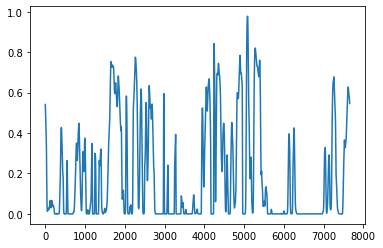

In [76]:
plt.plot(np.exp(-opticaldepth[('Helium', 'HeII')]['Optical depths']['Value']))

In [77]:
import multiprocessing

In [78]:
x = 0.757
y = 0.805
z = 0.879

In [79]:
dz = 0.01
dz = 2*dz
dx = 2e-3


In [80]:
sighlines_pos =  [(x-2*dx,y,z-dz),(x-dx,y,z-dz),(x,y,z-dz),(x+dx,y,z-dz),(x+2*dx,y,z-dz)]

In [81]:
def do_sight(isight, projections):
    Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[isight],ProjectionLength=2*dz)
    # read the particle data
    snapshot  = ReadData(wizard = Wizard)
    data                = snapshot.read_particles()
    # project the particle data
    sightlineprojection  = SightLineProjection(Wizard)

    projected_LOS = sightlineprojection.ProjectData(data)

    Wizard['sightline']['ProjectionExtend']["extend"]          = True
    Wizard['sightline']['ProjectionExtend']["extendfactor"]    = 20
    cspec          = ComputeOpticaldepth(Wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)
    result                = {"nsight": isight,  
                             'OpticaldepthWeighted':opticaldepth,
                              'Projected':projected_LOS}
    projections[isight] = result

In [82]:
ncpu   = 5      # number of cores to be used
nsight = 5     # number of sight lines to compute
#    
pool   = multiprocessing.Pool(ncpu)
manager      = multiprocessing.Manager()
projections_extended  = manager.dict()

for i in range(nsight):
    pool.apply_async(do_sight, args=(i, projections_extended))
pool.close()
pool.join()

Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1

Warning! SightLength NOT found. Setting default value : 1
Warning! SightLength NOT found. Setting default value : 1Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}


Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! nsight NOT found. Setting default value : 0Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}


Warning! nsight NOT found. Setting default value : 0


Warning! You are calculating a los shorter than the box-size 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column: Sum column:   7.385357244434154e+16193398002198553.75
Sum column:  
Column from tauColumn from tau 248689286451297.03
193398002198553.72 Column from tau
7.385357244434134e+16 
248689286451297.22
Sum column:  4029727362717.2227
Column from tau 4029727362717.221
Sum column:  Sum column:  2061902657111.8418Sum column: 
5308467047276.786Column from tau 
 1.9842584704750738e+18Column from tau2061902657111.841

 Column from tau5308467047276.788 
1.9842584704750723e+18
Sum column: Sum column:   7827903980.54142344723968712.209

Column from tauColumn from tau  44723968712.2090157827903980.541411

Sum column:  123749391.21102692
Column from tau 123749391.21102697


In [83]:
Ions = Wizard['ionparams']['Ions']
pixel_kms = snapshot.ToCGS(projected_LOS["pixel_kms"]) / 1e5
npix      = projected_LOS["npix"]
vel_kms   = np.arange(npix) * pixel_kms

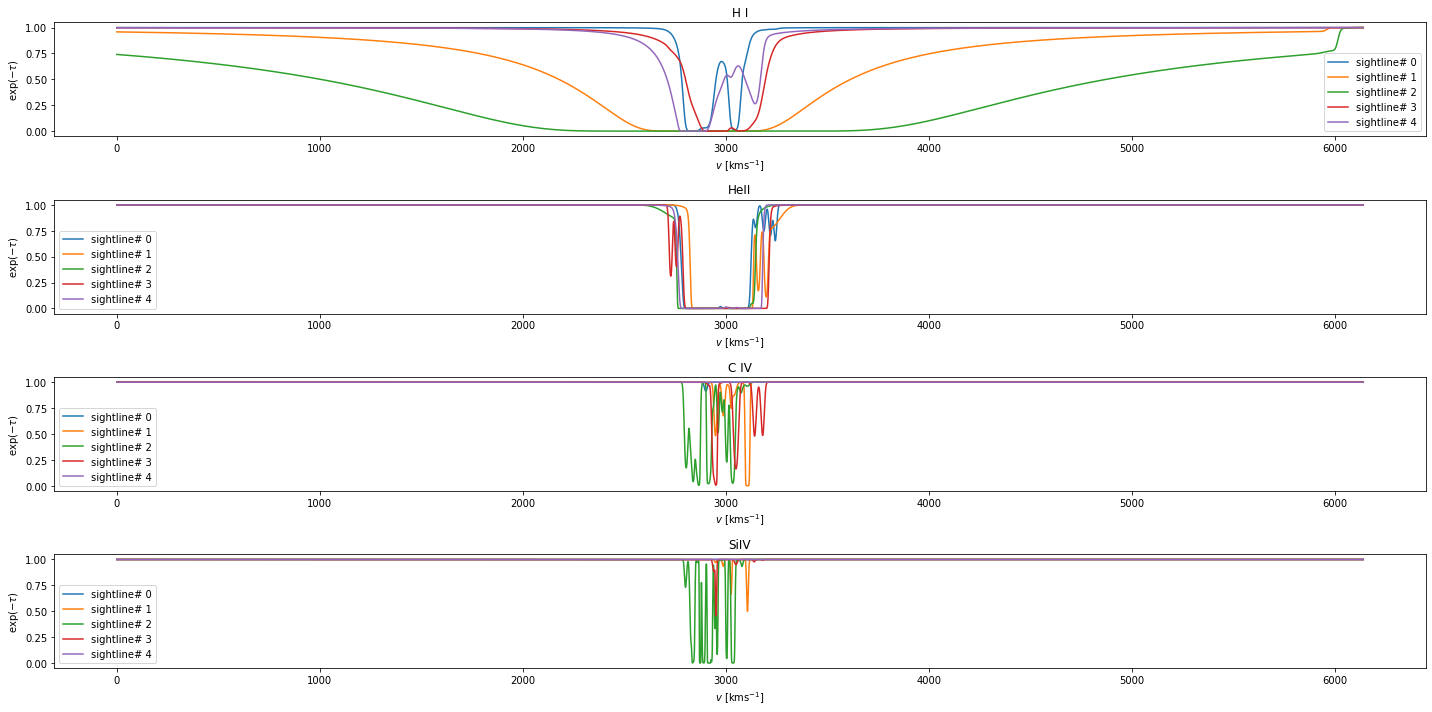

In [84]:
Numof_Ions = len(Ions)
fig, ax  = plt.subplots(Numof_Ions, 1, figsize = (20, 10))

for (i, ion) in zip (np.arange(Numof_Ions), Ions):
    #ax[i].set_xlim(0, box_kms)
    try:
        for j in range(5):
            ax[i].plot(np.exp(-snapshot.ToCGS(projections_extended[j]['OpticaldepthWeighted'][ion]['Optical depths'])),label = 'sightline# '+str(j))
    except:
        continue
    element, ion_name = ion
    title = r"{}".format(ion_name)
    ax[i].set_title(title)
    ax[i].set_ylabel(r"$\exp(-\tau)$")
    ax[i].set_xlabel(r"$v\ [{\rm km s}^{-1}]$")
    ax[i].legend()
    #ax[i].set_xlim(6200,6800)
fig.tight_layout()
fig.show()
plt.savefig("extended_tom.pdf",dpi=300)